(322, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtype

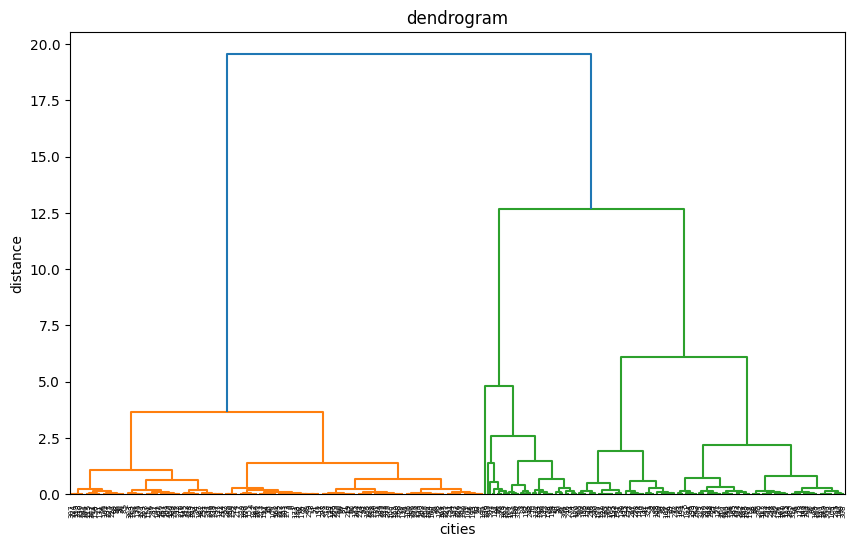

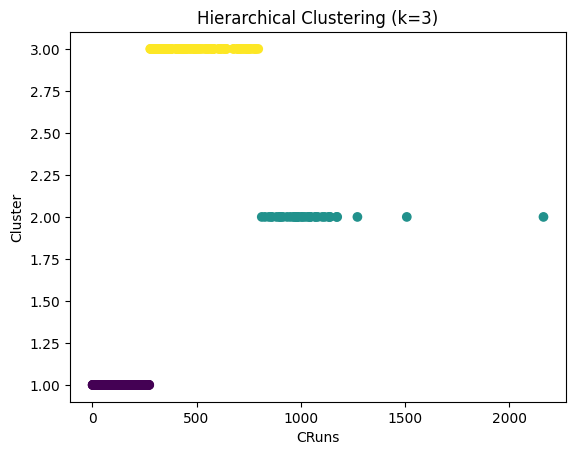

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# -----------------------------
# 1. Load dataset
# -----------------------------
df = pd.read_csv("hitters.csv")


print(df.shape)
print(df.info())

df.fillna(df.mode().loc[0], inplace=True)

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

x = df[["CRuns"]]
print(x)
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

linked = linkage(x_scaled, method="ward")

plt.figure(figsize=(10,6))
dendrogram(linked)
plt.title("dendrogram")
plt.xlabel("players")
plt.ylabel("distance")
plt.show()

clusters = fcluster(linked,3,criterion="maxclust")
df["Cluster"] = clusters

plt.scatter(df['CRuns'], df['Cluster'], c=df['Cluster'])
plt.title("Hierarchical Clustering (k=3)")
plt.xlabel("CRuns")
plt.ylabel("Cluster")
plt.show()